In [13]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [14]:
USE_CUDA = torch.cuda.is_available()
print("USE_CUDA:", USE_CUDA)
device = torch.device("cuda" if USE_CUDA else "cpu")
print("device:", device)

USE_CUDA: False
device: cpu


In [15]:
random.seed(777)
torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed_all(777)
    

In [16]:
#hyperparameters
training_epochs = 15
batch_size = 100

In [17]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [18]:
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True, drop_last=True) #drop_last=True : 마지막 배치가 batch_size보다 작을 경우 버림(마지막 배치의 과대평가 방지)

print(data_loader.dataset.train_data.shape)

torch.Size([60000, 28, 28])


/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [ ]:
linear = nn.Linear(28*28, 10, bias=True).to(device)
#입력X크기 : 28*28=784, 출력Y크기: 10(0~9 숫자 분류)

## 1차원 텐서로 표현해 쓴다
딱 봐도 각 셀간의 유클리드 거리를 무시하므로 별로 안 좋을 것 같아 보인다.  
**합성곱 신경망(CNN)** 을 공부하도록 하자

In [ ]:
criterion = nn.CrossEntropyLoss().to(device) #Softmax + CrossEntropyLoss
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:        #미니 배치
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch          #미니 배치 하나의 평균 비용

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))
print('Learning finished')

[Epoch:    1] cost = 0.535150588
[Epoch:    2] cost = 0.359577745
[Epoch:    3] cost = 0.331264257
[Epoch:    4] cost = 0.31640467
[Epoch:    5] cost = 0.307106972
[Epoch:    6] cost = 0.300456554
[Epoch:    7] cost = 0.294933408
[Epoch:    8] cost = 0.290956199
[Epoch:    9] cost = 0.287074089
[Epoch:   10] cost = 0.284515619
[Epoch:   11] cost = 0.281914055
[Epoch:   12] cost = 0.279526889
[Epoch:   13] cost = 0.277636588
[Epoch:   14] cost = 0.275874794
[Epoch:   15] cost = 0.274422765


Accuracy: 0.8883000016212463
Label:  2
Prediction:  2


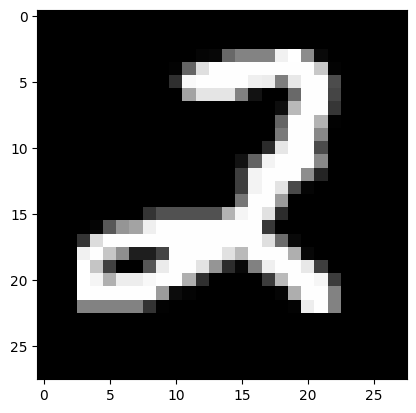

In [36]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)
    #왜 [r]안하고 [r:r+1]하는가? -> 하나의 데이터도 미니배치 형태로 만들어주기 위해서
    print('Label: ', Y_single_data.item())
    
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='gray')
    plt.show()

## 후기
방법이 너무 원시적인것 같다.  
아무리 그래도 글씨를 인식하는데 각 셀간의 위치관계를 고려 안 할 수 있나?  
그래도 중요한 예시라고, CNN이전에는 실제로 이걸 썼다고 한다